<a href="https://colab.research.google.com/github/GaloBaieli/Data-decisions/blob/main/clase15mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:
df=pd.read_excel('mic2.xlsx',
                 engine='openpyxl',
                )
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [4]:
def custom_cls(x):
    if (0<=x<=20):
        return '<=20'
    elif (21<=x<=30):
        return '21-30'
    elif (31<=x<=40):
        return '31-40'
    else:
        return '>40'

In [8]:
df['AgeGP']=df.apply(lambda tb1:custom_cls(tb1['Age']),
                     axis=1)
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31-40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21-30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21-30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21-30


In [12]:
age_gender=df.groupby(['AgeGP','Sex']).size()
age_gender=age_gender.to_frame()
age_gender

0
AgeGP Sex       
21-30 Female  11
      Male    20
31-40 Female   4
      Male     1
<=20  Female   5
      Male     6
>40   Female   2
      Male     1

In [14]:
age_sex=pd.pivot_table(index=['AgeGP','Sex'],
                       aggfunc=len,
                       values='Availability',
                       data=df,
                       margins=True)
age_sex

Availability
AgeGP Sex                 
21-30 Female            11
      Male              20
31-40 Female             4
      Male               1
<=20  Female             5
      Male               6
>40   Female             2
      Male               1
All                     50

In [17]:
age_gender=age_gender.rename(columns={0:'Count'})
age_gender

Count
AgeGP Sex          
21-30 Female     11
      Male       20
31-40 Female      4
      Male        1
<=20  Female      5
      Male        6
>40   Female      2
      Male        1

In [20]:
x=age_gender.iloc[:,-1].sum()
age_gender['%']=(age_gender.iloc[:,-1]/x)*100
age_gender


Count     %
AgeGP Sex                
21-30 Female     11  22.0
      Male       20  40.0
31-40 Female      4   8.0
      Male        1   2.0
<=20  Female      5  10.0
      Male        6  12.0
>40   Female      2   4.0
      Male        1   2.0

In [21]:
plot_order=['<=20','21-30','31-40','>40']

In [25]:
import seaborn as sns

AttributeError: ignored

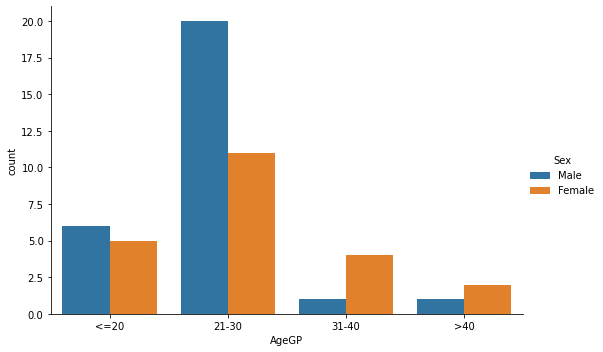

In [28]:
g=sns.catplot(x='AgeGP',
              kind='count',
              data=df,
              hue='Sex',
              order=plot_order,
              height=5,
              aspect=1.5)
g.show()

In [30]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [34]:
fig=px.sunburst(age_gender,
                values='Count',
                path=['%','Count']
                )
fig.show()

In [53]:
pip install dash

In [51]:
import dash

In [38]:
from dash import dcc

In [40]:
pip install jupyter_dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=089b5fe4c1fd56fc0ae9764300c1ff9761dc92c310e25055f52c7ae5ffdd1587
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [43]:
from jupyter_dash import JupyterDash

In [54]:
from dash import htm1

ImportError: ignored

In [55]:
p2=JupyterDash(__name__)
p2.layout=htm1.Div(children=[htm1.H1('Title',
                                      ),
                              dcc.Graph(figure=fig)
                              ]
)
if__name__='__main__':
  app2.run_server()

SyntaxError: ignored